In [224]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [225]:
nba_data = pd.read_csv('nba.games.stats_raw.csv', index_col=0, encoding='utf-8')

In [226]:
nba_data['new_date']=pd.to_datetime(nba_data['Date'])
start_date = '10/01/2017'
end_date = '04/30/2018'
mask = (nba_data['new_date'] > start_date) & (nba_data['new_date'] <= end_date)
nba_data=nba_data.loc[mask]
nba_data

,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,...,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,new_date
5460,ATL,54,10/02/2017,Away,SAC,L,107,108,36,71,...,21,0.667,8,39,27,12,2,18,27,2017-10-02
6560,ATL,65,10/03/2017,Home,TOR,W,105,99,39,75,...,27,0.778,16,46,19,17,5,11,28,2017-10-03
6660,ATL,66,11/03/2017,Away,MEM,W,107,90,36,72,...,23,0.739,13,41,22,11,3,13,21,2017-11-03
8161,ATL,81,11/04/2017,Home,CHO,W,103,76,41,79,...,19,0.789,15,40,16,11,1,13,17,2017-11-04
8260,ATL,82,12/04/2017,Away,IND,L,86,104,30,72,...,19,0.842,8,41,21,5,7,10,14,2017-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74119,WAS,74,27/03/2018,Home,SAS,W,116,106,46,85,...,33,0.545,10,37,29,7,5,8,17,2018-03-27
75119,WAS,75,29/03/2018,Away,DET,L,92,103,37,89,...,20,0.750,10,44,26,9,3,16,14,2018-03-29
76119,WAS,76,31/03/2018,Home,CHO,W,107,93,40,88,...,27,0.630,9,46,22,6,2,17,14,2018-03-31
77119,WAS,77,01/04/2018,Away,CHI,L,94,113,37,81,...,13,0.692,6,40,30,7,1,17,17,2018-01-04


In [227]:
nba_data.head()

,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,...,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,new_date
5460,ATL,54,10/02/2017,Away,SAC,L,107,108,36,71,...,21,0.667,8,39,27,12,2,18,27,2017-10-02
6560,ATL,65,10/03/2017,Home,TOR,W,105,99,39,75,...,27,0.778,16,46,19,17,5,11,28,2017-10-03
6660,ATL,66,11/03/2017,Away,MEM,W,107,90,36,72,...,23,0.739,13,41,22,11,3,13,21,2017-11-03
8161,ATL,81,11/04/2017,Home,CHO,W,103,76,41,79,...,19,0.789,15,40,16,11,1,13,17,2017-11-04
8260,ATL,82,12/04/2017,Away,IND,L,86,104,30,72,...,19,0.842,8,41,21,5,7,10,14,2017-12-04


In [228]:
nba_data=nba_data.replace({'Home' : {'Home' : 1, 'Away' : 0}})
nba_data=nba_data.replace({'WINorLOSS' : {'L' : 0, 'W' : 1}})

In [229]:
y=nba_data['WINorLOSS']

In [230]:
y

5460     0
6560     1
6660     1
8161     1
8260     0
        ..
74119    1
75119    0
76119    1
77119    0
78119    0
Name: WINorLOSS, Length: 1920, dtype: int64

In [231]:
x=nba_data
del x['WINorLOSS']
del x['TeamPoints']
del x['OpponentPoints']
del x['Team']
del x['Opponent']
del x['Date']
del x['Game']
del x['new_date']

In [232]:
x

,Home,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
5460,0,36,71,0.507,11,30,0.367,24,31,0.774,...,14,21,0.667,8,39,27,12,2,18,27
6560,1,39,75,0.520,8,22,0.364,19,29,0.655,...,21,27,0.778,16,46,19,17,5,11,28
6660,0,36,72,0.500,15,30,0.500,20,26,0.769,...,17,23,0.739,13,41,22,11,3,13,21
8161,1,41,79,0.519,7,27,0.259,14,18,0.778,...,15,19,0.789,15,40,16,11,1,13,17
8260,0,30,72,0.417,11,29,0.379,15,19,0.789,...,16,19,0.842,8,41,21,5,7,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74119,1,46,85,0.541,10,24,0.417,14,18,0.778,...,18,33,0.545,10,37,29,7,5,8,17
75119,0,37,89,0.416,6,32,0.188,12,15,0.800,...,15,20,0.750,10,44,26,9,3,16,14
76119,1,40,88,0.455,18,39,0.462,9,12,0.750,...,17,27,0.630,9,46,22,6,2,17,14
77119,0,37,81,0.457,8,30,0.267,12,12,1.000,...,9,13,0.692,6,40,30,7,1,17,17


In [233]:
lab=['Home', 'FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted'
    , 'X3PointShots.', 'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds'
    , 'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls', 'Opp.FieldGoals'
    , 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted'
    , 'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.'
    , 'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals', 'Opp.Blocks'
    , 'Opp.Turnovers', 'Opp.TotalFouls']

In [234]:
x=np.array(x)
y=np.array(y)

In [235]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [236]:
x_scaled=scaler.transform(x)

In [237]:
x_scaled[0]

array([-1.        , -0.69282194, -2.15918964,  0.85572108,  0.16977808,
        0.17622954,  0.07309202,  1.20882169,  1.2528974 ,  0.03640149,
       -1.85898492, -1.03828098, -0.80655525, -0.58465491,  0.08301343,
        0.62065296, -0.66297357, -0.29961528, -0.86551754,  0.26842965,
        2.12673981,  1.06509307,  1.51127803, -0.46320312, -0.11134181,
       -0.99338661, -0.50102911, -0.7226041 ,  0.74922632,  1.43187939,
       -1.1123799 ,  1.14992397,  1.70743473])

In [238]:
len(x_scaled)

1920

In [239]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, shuffle=False)

In [240]:
xgb=XGBClassifier(random_state=0)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [241]:
print('훈련세트 정확도 : ', xgb.score(x_train, y_train))
print('테스트세트 정확도 : ', xgb.score(x_test, y_test))

훈련세트 정확도 :  0.986328125
테스트세트 정확도 :  0.9244791666666666


In [242]:
print('특성 중요도:\n', xgb.feature_importances_)

특성 중요도:
 [0.         0.04647819 0.         0.12507828 0.03695222 0.01984154
 0.03934132 0.03308956 0.02146265 0.01554633 0.03642239 0.0453706
 0.02315783 0.0239115  0.         0.02518359 0.02830697 0.04893654
 0.         0.09744182 0.04019204 0.         0.05264319 0.0346509
 0.02247009 0.01372369 0.01934405 0.03627672 0.02755596 0.03369709
 0.01855392 0.02072003 0.01365102]


In [243]:
print(x_scaled.shape[1])

33


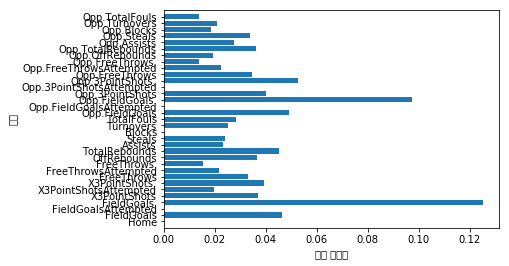

In [244]:
def plot_feature_importances_cancer(model):
    n_features = x.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), lab)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(xgb)
plt.show()

In [245]:
np.arange(x.shape[1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [246]:
su=[]
for i, xg in enumerate(xgb.feature_importances_):
    if xg==0:
        print(lab[i])
        su.append(i)
        
print(su)

Home
FieldGoalsAttempted
Blocks
Opp.FieldGoalsAttempted
Opp.3PointShotsAttempted
[0, 2, 14, 18, 21]


In [247]:
realx=x.copy()
reallab=lab.copy()

In [222]:
for i , _ in enumerate(su) :
    if i==0 :
        del reallab[su[i]]
    
    elif i !=0 :
        del reallab[su[i]-1]


for tx in x :
    
    while(True):
            if i==0 :
                np.delete(tx, su[i])
            
            elif i !=0 :
                np.delete(tx, su[i]-1)
        

In [223]:
x[0]

array([ 0.   , 36.   , 71.   ,  0.507, 11.   , 30.   ,  0.367, 24.   ,
       31.   ,  0.774,  3.   , 37.   , 19.   ,  6.   ,  5.   , 16.   ,
       17.   , 38.   , 80.   ,  0.475, 18.   , 36.   ,  0.5  , 14.   ,
       21.   ,  0.667,  8.   , 39.   , 27.   , 12.   ,  2.   , 18.   ,
       27.   ])

In [177]:
reallab

['FieldGoals',
 'FieldGoals.',
 'X3PointShots',
 'X3PointShotsAttempted',
 'X3PointShots.',
 'FreeThrows',
 'FreeThrowsAttempted',
 'FreeThrows.',
 'OffRebounds',
 'TotalRebounds',
 'Assists',
 'Steals',
 'Blocks',
 'TotalFouls',
 'Opp.FieldGoals',
 'Opp.FieldGoalsAttempted',
 'Opp.FieldGoals.',
 'Opp.3PointShotsAttempted',
 'Opp.3PointShots.',
 'Opp.FreeThrows',
 'Opp.FreeThrows.',
 'Opp.OffRebounds',
 'Opp.TotalRebounds',
 'Opp.Assists',
 'Opp.Steals',
 'Opp.Blocks',
 'Opp.Turnovers',
 'Opp.TotalFouls']

훈련세트 정확도 :  0.986328125
테스트세트 정확도 :  0.9244791666666666
특성 중요도:
 [0.         0.04647819 0.         0.12507828 0.03695222 0.01984154
 0.03934132 0.03308956 0.02146265 0.01554633 0.03642239 0.0453706
 0.02315783 0.0239115  0.         0.02518359 0.02830697 0.04893654
 0.         0.09744182 0.04019204 0.         0.05264319 0.0346509
 0.02247009 0.01372369 0.01934405 0.03627672 0.02755596 0.03369709
 0.01855392 0.02072003 0.01365102]


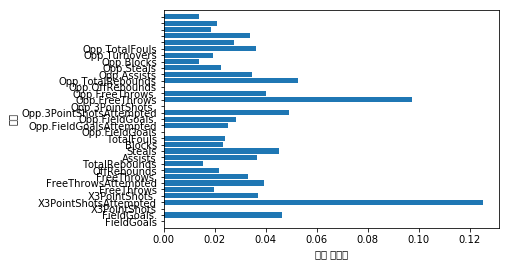

In [189]:
realx_scaled=scaler.transform(realx)
realx_train, realx_test, realy_train, realy_test = train_test_split(realx_scaled, y, test_size=0.2, shuffle=False)
realxgb=XGBClassifier(random_state=0)
realxgb.fit(realx_train, realy_train)
print('훈련세트 정확도 : ', realxgb.score(realx_train, realy_train))
print('테스트세트 정확도 : ', realxgb.score(realx_test, realy_test))
print('특성 중요도:\n', realxgb.feature_importances_)

def plot_feature_importances_cancer(model):
    n_features = realx.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), reallab)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(realxgb)
plt.show()

In [190]:
realxgb.feature_importances_

array([0.        , 0.04647819, 0.        , 0.12507828, 0.03695222,
       0.01984154, 0.03934132, 0.03308956, 0.02146265, 0.01554633,
       0.03642239, 0.0453706 , 0.02315783, 0.0239115 , 0.        ,
       0.02518359, 0.02830697, 0.04893654, 0.        , 0.09744182,
       0.04019204, 0.        , 0.05264319, 0.0346509 , 0.02247009,
       0.01372369, 0.01934405, 0.03627672, 0.02755596, 0.03369709,
       0.01855392, 0.02072003, 0.01365102], dtype=float32)

In [191]:
reallab

['FieldGoals',
 'FieldGoals.',
 'X3PointShots',
 'X3PointShotsAttempted',
 'X3PointShots.',
 'FreeThrows',
 'FreeThrowsAttempted',
 'FreeThrows.',
 'OffRebounds',
 'TotalRebounds',
 'Assists',
 'Steals',
 'Blocks',
 'TotalFouls',
 'Opp.FieldGoals',
 'Opp.FieldGoalsAttempted',
 'Opp.FieldGoals.',
 'Opp.3PointShotsAttempted',
 'Opp.3PointShots.',
 'Opp.FreeThrows',
 'Opp.FreeThrows.',
 'Opp.OffRebounds',
 'Opp.TotalRebounds',
 'Opp.Assists',
 'Opp.Steals',
 'Opp.Blocks',
 'Opp.Turnovers',
 'Opp.TotalFouls']

In [192]:
realx

array([[ 0., 36., 71., ...,  2., 18., 27.],
       [ 1., 39., 75., ...,  5., 11., 28.],
       [ 0., 36., 72., ...,  3., 13., 21.],
       ...,
       [ 1., 40., 88., ...,  2., 17., 14.],
       [ 0., 37., 81., ...,  1., 17., 17.],
       [ 0., 38., 72., ...,  3.,  9., 14.]])

In [220]:
len(realx[0])

33